# Green Screen Demo using OpenCV

Implementing green/blue screen effects with OpenCV

## To run demo click the grey play buttons!

### **Import resources** 
(These are needed on the very top in order to run the program. Make sure this is ran to have the whole code work. To run this, hover over the gray box below and click on the "play" button)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# When you enable the ‘inline’ matplotlib backend, the output of the plotting
# commands written will be displayed inline within the frontends like jupyter
# notebook. It means, the plot/graph will be displayed directly below the cell
# (where the plotting commands are written) and the resulted plot/graph will
# also be included (stored) in your notebook document. 
%matplotlib inline

### **Step 0:** Get your picture taken, and upload it!

1. Get your picture taken!
	- Someone from Boise State will email you the picture.
1. Open the grey folder to the left in colab.
1. Download the picture from your email.
1. After you click download, the picture should show up in the bottom right of your chrome window. Click the arrow to the right. Then click "Show in Folder" on the pop up menu.

	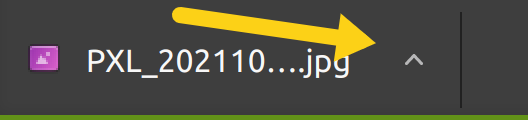
1. Drag and drop image that you would like to use from your computer to the drawer panel that opened when you clicked the grey folder.
1. In that same panel elect "Copy Path".

	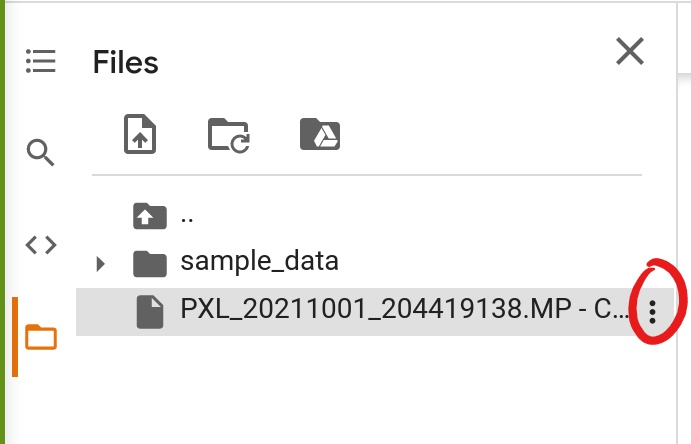

1. highlight the "paste path here" below. Make sure to leave the single quotation marks around "paste path here" and paste the path you copied

### **Step 1:** We can begin the greenscreen demo by reading in and displaying the image. 

In [2]:
path = 'paste path here'

# Read in the images
image = cv2.imread(path)

#print out the type of image data and its dimensions (height, width, and color)
print('image type:', type(image), 
      ' with dimensions:', image.shape)

image type: <class 'numpy.ndarray'>  with dimensions: (401, 714, 3)


**Step 2:** Next we will make a copy of the image and change the color to RGB (red, green, blue). You do not need to modify this part. Just run it by hovering over the two gray sections of code down below and click on the "play" button.

In [3]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

**Step 3:** Now we will display the image. Again, no modifications are required. Simply run the code by clicking on the "play" button to display the image. You should be able to see the image you uploaded on here.

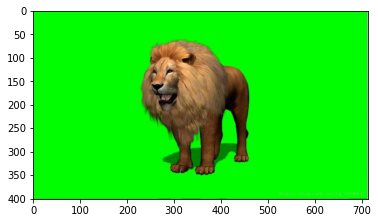

In [4]:
# Display the image
plt.imshow(image_copy)

In [5]:
image_copy

array([[[185, 255, 182],
        [ 58, 213,  57],
        [ 15, 239,  19],
        ...,
        [ 33, 231,  30],
        [ 42, 139,  44],
        [222, 255, 228]],

       [[185, 255, 182],
        [ 58, 213,  57],
        [ 15, 239,  19],
        ...,
        [ 33, 231,  30],
        [ 42, 139,  44],
        [222, 255, 228]],

       [[185, 255, 182],
        [ 58, 213,  57],
        [ 15, 239,  19],
        ...,
        [ 33, 231,  30],
        [ 42, 139,  44],
        [222, 255, 228]],

       ...,

       [[185, 255, 182],
        [ 58, 213,  57],
        [ 15, 239,  19],
        ...,
        [ 30, 231,  29],
        [ 33, 128,  36],
        [226, 255, 232]],

       [[193, 255, 189],
        [ 70, 205,  67],
        [ 38, 224,  37],
        ...,
        [ 46, 218,  46],
        [ 40, 123,  41],
        [229, 255, 230]],

       [[210, 255, 202],
        [ 70, 160,  62],
        [ 55, 169,  47],
        ...,
        [ 22, 136,  22],
        [ 55, 111,  48],
        [236, 255, 228]]

### **Step 4:** Define the color threshold and create a mask
We have defined lower and upper bounds for the colors that we need to isolate and remove which are *green*. The only modifications required for this code is experimenting with the values. Notice these values are in RGB. A good way to change the values of the color would be by looking at an online color picker to see the RBG values.

####  <ins>Create a mask</ins>
- Masks are a common way to isolate a selected area of interest.

- The `inRange()` function takes in an image in our lower and upper colour range and defines a mask by asking if the colour value of each image pixel falls in that range of colour thresholds. 

- If it does, then the mask is allowed to be displayed. If it doesn't, it will block it out and turn the pixel black.

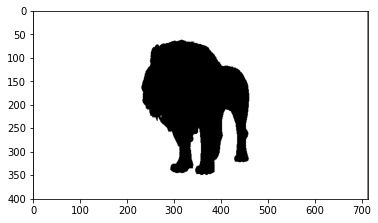

In [6]:
# play around with these values until you isolate the color background
lower_green = np.array([0,100, 0])
upper_green = np.array([80, 255,255])

# Define the masked area, this is where the mask is created
green_mask = cv2.inRange(image_copy, lower_green, upper_green)

# Vizualize the masks
plt.imshow(green_mask,'gray')

The white area is where the image will be allowed to show through and the black will be blocked out. 

- To select the blue/green screen, we ask for the part of the image that overlaps with the part of the mask that is white (or not black).  
- i.e., we’ll select the part of the image where the area of the mask is not equal to zero, using `mask != 0` .  
- So, to block this background area out we then set the pixels to black `[0,0,0]`. 

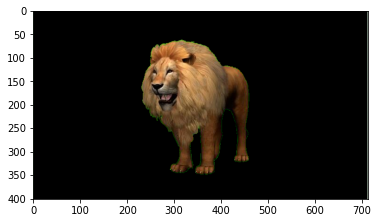

In [7]:
# Mask the image to let the tree show through
masked_image = np.copy(image_copy)
masked_image[green_mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

### **Step 5:** Find a bacground image that you would like on Google images
Repeat steps from Step 0 to upload it to colab.

### **Step 6:** Mask and add a background image

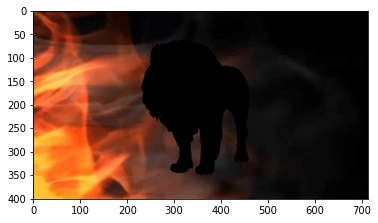

In [8]:
path = 'paste path here'

# Load in a background image, and convert it to RGB 
background_image = cv2.imread(path)
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Resize it to the right size 
width = image.shape[1]
height = image.shape[0]
dim = (width, height)
resized_background = cv2.resize(background_image, dim, width, height)

# Mask the cropped background so that the lion area is blocked(using the mask!!)
resized_background[green_mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(resized_background)

### **Step 7:** Create a complete image. No modification is required. Just run the code.



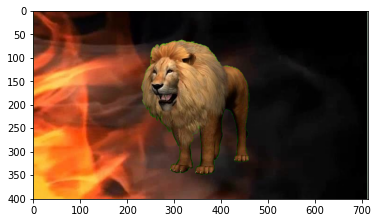

In [9]:
# Add the two images together to create a complete image!
final_image = crop_background + masked_image

# Display the result
plt.imshow(final_image)

### **Step 8:** Saving the image
To save the image to disk, convert back from RGB to BGR and the use the `imwrite()` function. All you need to do in this part is create a name to save your image as.

In [10]:
final_image = cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR)

# TODO: Change the 'fire-lion.png' to whatever name you want.
# Example: 'cool_starrypicture.png' 
cv2.imwrite('fire-lion.png', final_image)

True